# Data Description
This is a 21 class land use image dataset meant for research purposes. 
There are 100 images for each of the following classes:
+ agricultural
+ airplane
+ baseballdiamond
+ beach
+ buildings
+ chaparral
+ denseresidential
+ forest
+ freeway
+ golfcourse
+ harbor
+ intersection
+ mediumresidential
+ mobilehomepark
+ overpass
+ parkinglot
+ river
+ runway
+ sparseresidential
+ storagetanks
+ tenniscourt

Each image measures 256x256 pixels.

The images were manually extracted from large images from the USGS National Map Urban Area Imagery collection for various urban areas around the country. The pixel resolution of this public domain imagery is 1 foot.

Download site: http://weegee.vision.ucmerced.edu/datasets/landuse.html

# Data processing

## 1. Data Collection

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model,to_categorical
from skimage.transform import resize
import cv2
from PIL import Image
import os
from shutil import copyfile

In [2]:
import os
os.getcwd()
os.chdir("/Users/qingruan/Desktop/Capstone")

In [3]:
Image_directory = 'data/UCMerced_LandUse/Images'
category_names_all = os.listdir(Image_directory)
print('Total categories: {}'.format(len(category_names_all)))

Total categories: 21


In [4]:
print(category_names_all)

['forest', 'buildings', 'river', 'mobilehomepark', 'harbor', 'golfcourse', 'agricultural', 'runway', 'baseballdiamond', 'overpass', 'chaparral', 'tenniscourt', 'intersection', 'airplane', 'parkinglot', 'sparseresidential', 'mediumresidential', 'denseresidential', 'beach', 'freeway', 'storagetanks']


In [5]:
for category in category_names_all:
    print('{}:{}'.format(category, len([name for name in os.listdir(Image_directory+'/'+category)])))

forest:100
buildings:100
river:100
mobilehomepark:100
harbor:100
golfcourse:100
agricultural:100
runway:100
baseballdiamond:100
overpass:100
chaparral:100
tenniscourt:100
intersection:100
airplane:100
parkinglot:100
sparseresidential:100
mediumresidential:100
denseresidential:100
beach:100
freeway:100
storagetanks:100


In this dataset, we totally have 21 classes of images, such as airplane, parkinglot and overpass. And each class has 100 images.

## 2. Data preprocessing

### 2.1 Resize data and convert into array 

In [6]:
category_names = ['forest', 'buildings', 'river', 'mobilehomepark', 'harbor', 'golfcourse', 'agricultural', 'runway', 'baseballdiamond', 'overpass', 'chaparral', 'tenniscourt', 'intersection', 'airplane', 'parkinglot', 'sparseresidential', 'mediumresidential', 'denseresidential', 'beach', 'freeway', 'storagetanks']

In [7]:
print(os.path.join(Image_directory, category_names[0], category_names[0]+'{:02d}.tif'.format(1)))

data/UCMerced_LandUse/Images/forest/forest01.tif


In [8]:
num_images = 100  # per category
nb_classes = len(category_names)
patch_size = 256  # width and height in pixel
channels = 3

In [9]:
# Load the original dataset
images_orig = []
labels_num = []
for i in range(len(category_names)):    
    # load all images per class
    for j in range(num_images):        
        img_path = os.path.join(Image_directory, category_names[i], category_names[i]+'{:02d}.tif'.format(j))
        
        #new_image = plt.imread(img_path) 
        #resized_image = resize(new_image, (patch_size/4, patch_size/4, channels))
        img = Image.open(img_path)
        
        resized_img = img.resize((patch_size//4, patch_size//4), Image.ANTIALIAS)

        arr = np.asarray(resized_img)
        
        images_orig.append(arr)
        labels_num.append([i])

In [10]:
images_orig = np.array(images_orig)

print('Image Original Data Type: %s' % images_orig[0][0][0][0].dtype)
print('Original: Min: %.3f, Max: %.3f' % (images_orig.min(), images_orig.max()))
# convert from integers to floats
images_orig = images_orig.astype('float32')
# normalize to the range 0-1
images_orig /= 255.0
# confirm the normalization
print('\nImage Resized Data Type: %s' % images_orig[0].dtype)
print('Resized: Min: %.3f, Max: %.3f' % (images_orig.min(), images_orig.max()))

labels_num = np.array(labels_num)



Image Original Data Type: uint8
Original: Min: 0.000, Max: 255.000

Image Resized Data Type: float32
Resized: Min: 0.000, Max: 1.000


In [11]:
images_orig.shape

(2100, 64, 64, 3)

In [12]:
labels_num.shape

(2100, 1)

### 2.3 One-hot encoding 

In [13]:
labels = to_categorical(labels_num, nb_classes)

print('Orginal Labels: \n')
for i in range(1,(nb_classes)*100+1, 100):
    print(labels_num[i])

print('One-hot encoded Labels: \n')
for i in range(1,(nb_classes)*100+1, 100):
    print(labels[i])

Orginal Labels: 

[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[16]
[17]
[18]
[19]
[20]
One-hot encoded Labels: 

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 

### 2.4 Data visualization

forest
(100, 64, 64, 3)


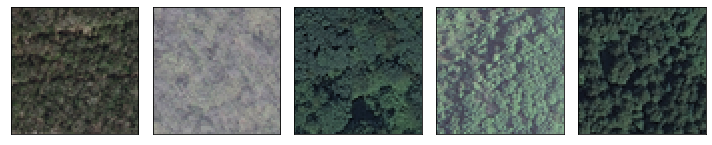

buildings
(100, 64, 64, 3)


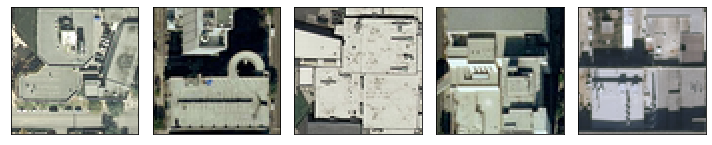

river
(100, 64, 64, 3)


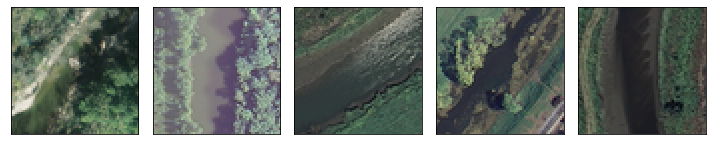

mobilehomepark
(100, 64, 64, 3)


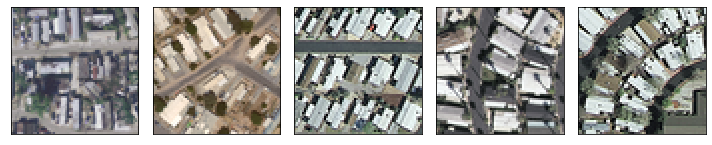

harbor
(100, 64, 64, 3)


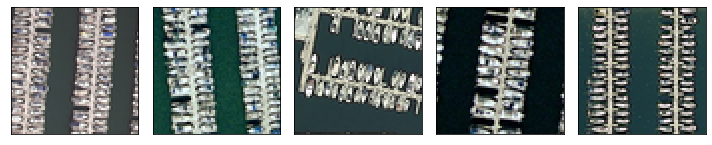

golfcourse
(100, 64, 64, 3)


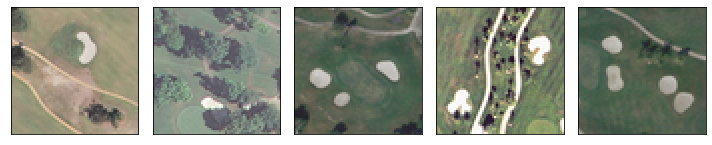

agricultural
(100, 64, 64, 3)


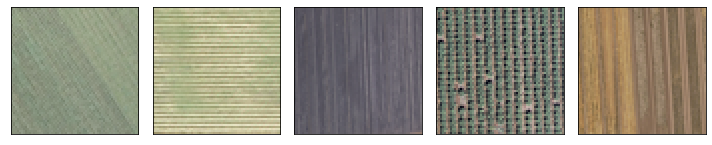

runway
(100, 64, 64, 3)


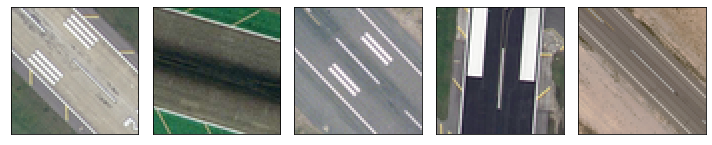

baseballdiamond
(100, 64, 64, 3)


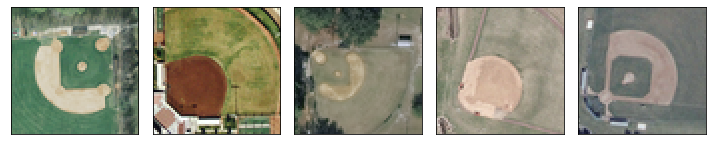

overpass
(100, 64, 64, 3)


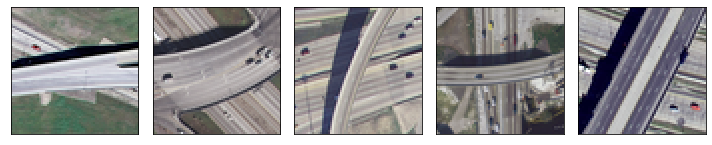

chaparral
(100, 64, 64, 3)


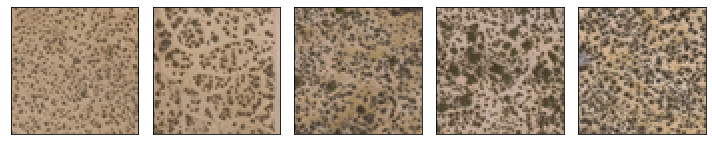

tenniscourt
(100, 64, 64, 3)


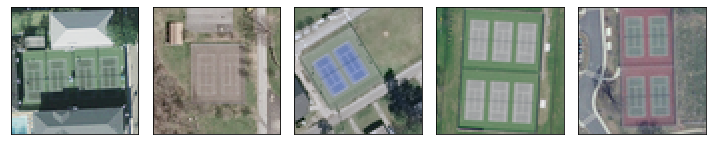

intersection
(100, 64, 64, 3)


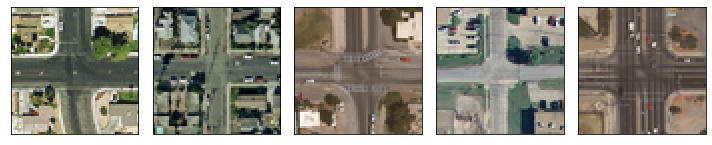

airplane
(100, 64, 64, 3)


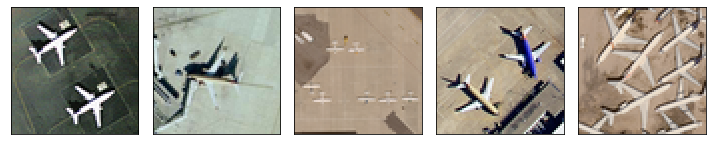

parkinglot
(100, 64, 64, 3)


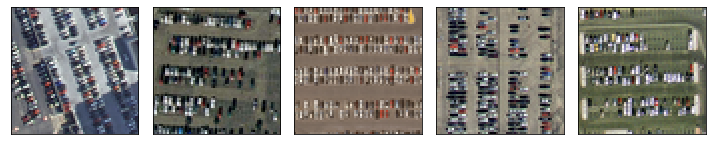

sparseresidential
(100, 64, 64, 3)


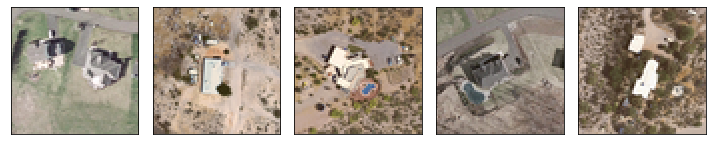

mediumresidential
(100, 64, 64, 3)


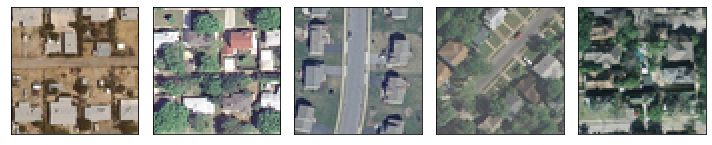

denseresidential
(100, 64, 64, 3)


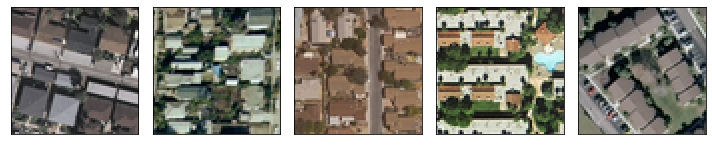

beach
(100, 64, 64, 3)


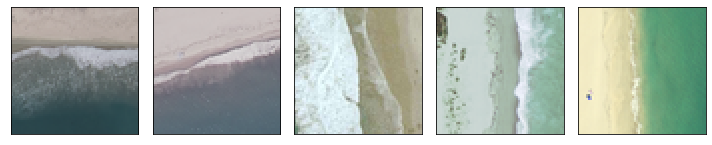

freeway
(100, 64, 64, 3)


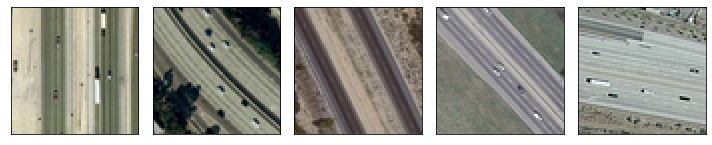

storagetanks
(100, 64, 64, 3)


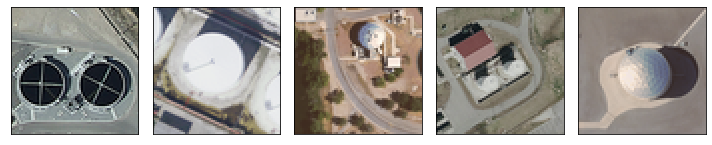

In [14]:
# VISUALIZE IMAGES
def plotImages( images, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(10, 10))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img)
        ax.set_xticks(())
        ax.set_yticks(())
    plt.tight_layout()
    plt.show()

# Plot some examples for each category    
def plot_examples_per_category():
    for i in range(nb_classes):
        print(category_names[i])
        images_to_print = images_orig[i*num_images:(i+1)*num_images]
        np.random.seed(2020)
        np.random.shuffle(images_to_print)
        print(images_to_print.shape)
        plotImages(images_to_print)

plot_examples_per_category()

### 2.5 Save data

In [15]:
# save the numpy datasets
np.save('data/UCMerced_images_orig_Class.npy', images_orig)
np.save('data/UCMerced_labels_Class.npy', labels)   